Column name:  satisfaction_level
Mean:  0.61
Median:  0.64
Mode:  0.1
Min:  0.09
Max:  1.0
Standart deviation:  0.25


Column name:  last_evaluation
Mean:  0.72
Median:  0.72
Mode:  0.55
Min:  0.36
Max:  1.0
Standart deviation:  0.17


Column name:  number_project
Mean:  3.8
Median:  4.0
Mode:  4.0
Min:  2
Max:  7
Standart deviation:  1.23


Column name:  average_montly_hours
Mean:  201.05
Median:  200.0
Mode:  135.0
Min:  96
Max:  310
Standart deviation:  49.94


Column name:  time_spend_company
Mean:  3.5
Median:  3.0
Mode:  3.0
Min:  2
Max:  10
Standart deviation:  1.46


Column name:  Work_accident
Mean:  0.14
Median:  0.0
Mode:  0.0
Min:  0
Max:  1
Standart deviation:  0.35


Column name:  left
Mean:  0.24
Median:  0.0
Mode:  0.0
Min:  0
Max:  1
Standart deviation:  0.43


Column name:  promotion_last_5years
Mean:  0.02
Median:  0.0
Mode:  0.0
Min:  0
Max:  1
Standart deviation:  0.14


Column name:  department
Mode:  ['sales']
Column name:  salary
Mode:  ['low']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Most correlated attributes: "number_project" and "average_montly_hours" (corr = 0.417)
Least correlated attributes: "promotion_last_5years" and "left" (corr = -0.062)


Number of employees by department:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


[Text(1173.276595744681, 0.5, 'Number of employees'),
 Text(0.5, 1.0, 'management')]

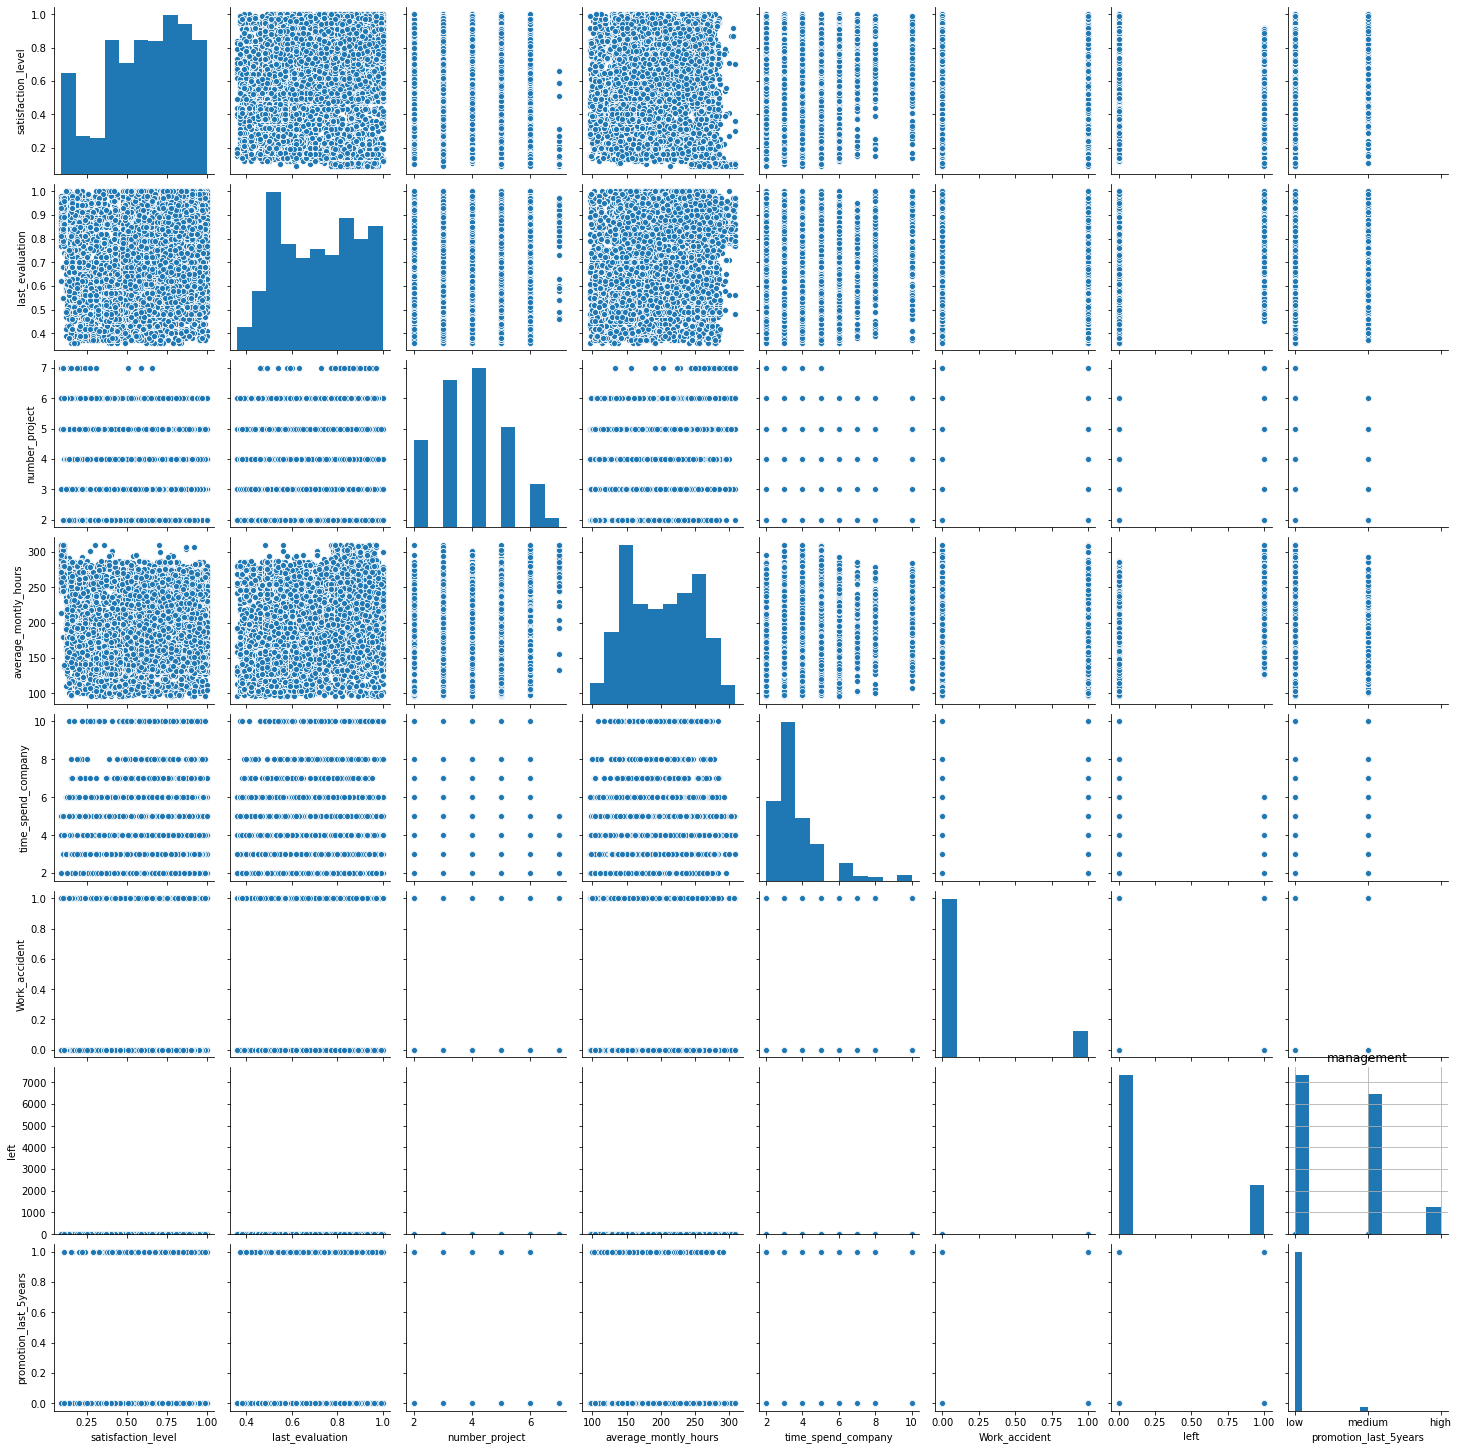

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

"""1"""
HR = pd.read_csv('HR.csv')

"""2"""
numeric_attributes = ['satisfaction_level', 
                      'last_evaluation',
                      'number_project',
                      'average_montly_hours',
                      'time_spend_company',
                      'Work_accident',
                      'left',
                      'promotion_last_5years']
for (columnName, columnData) in HR[numeric_attributes].iteritems():
    print('Column name: ', columnName)
    print('Mean: ', float("{0:.2f}".format(np.mean(columnData.values))))
    print('Median: ', np.median(columnData.values))
    print('Mode: ', float(stats.mode(columnData.values)[0]))
    print('Min: ', np.min(columnData.values))
    print('Max: ', np.max(columnData.values))
    print('Standart deviation: ', float("{0:.2f}".format(np.std(columnData.values))))
    print('\n')
for (columnName, columnData) in HR[['department', 'salary']].iteritems():
    print('Column name: ', columnName)
    print('Mode: ', stats.mode(columnData.values)[0])
    
"""3"""
display(HR.corr())
sns.pairplot(HR[numeric_attributes])
min_corr = min(HR.corr().iloc[0][1],HR.corr().iloc[0][2])
max_corr = max(HR.corr().iloc[0][1],HR.corr().iloc[0][2])
min_attr, max_attr = [], []
#print(HR[['satisfaction_level','last_evaluation']].corr()['satisfaction_level']['last_evaluation'])
for attr_1 in numeric_attributes:    
    for attr_2 in numeric_attributes:
        if attr_2 != attr_1:
            if abs(min_corr) > HR[attr_1].corr(HR[attr_2]):                
                min_corr = HR[attr_1].corr(HR[attr_2])
                min_attr = [attr_1, attr_2]
            if abs(max_corr) < HR[attr_1].corr(HR[attr_2]):                
                max_corr = HR[attr_1].corr(HR[attr_2])
                max_attr = [attr_1, attr_2]  
print('Most correlated attributes: "{}" and "{}" (corr = {:.3f})'.format(max_attr[0], max_attr[1], max_corr))
print('Least correlated attributes: "{}" and "{}" (corr = {:.3f})'.format(min_attr[0], min_attr[1], min_corr))
print('\n')

"""4"""
print('Number of employees by department:')
print(HR['department'].value_counts())

"""5"""
HR['salary']
display(HR['salary'].hist())
plt.gca().set(title=dep, ylabel='Number of employees')